# Feedforward neural network

In [1]:
!pip install keras

#### Import the packages

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

#### Load the training and testing data (MNIST

In [3]:
(x_train, y_train),(x_test, 
                    y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

In [7]:
x = np.zeros(100).reshape(10,10)

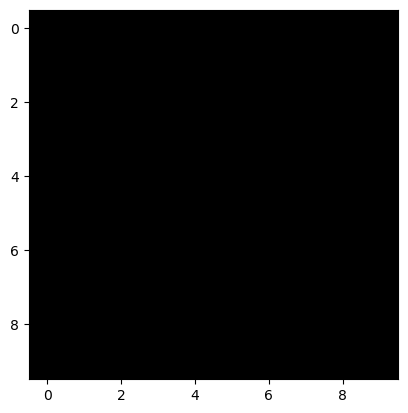

In [8]:
plt.imshow(x, cmap='gray')

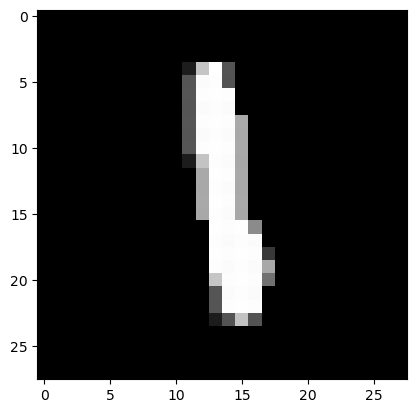

In [9]:
plt.imshow(x_train[200], cmap='gray')

In [10]:
y_train[200]

1

Text(0.5, 1.0, '2')

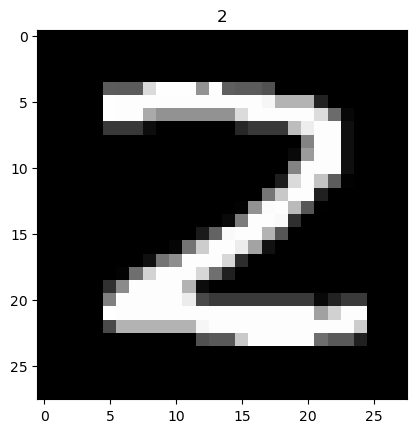

In [11]:
plt.imshow(x_train[220], cmap='gray')
plt.title(y_train[220])

Text(0.5, 1.0, '7')

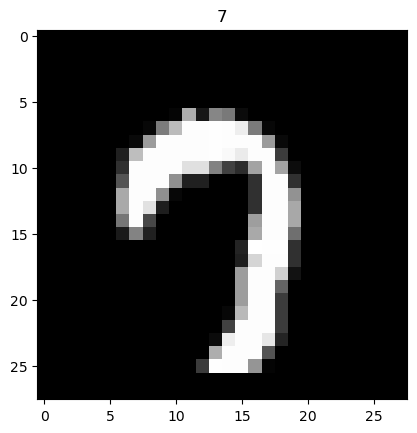

In [12]:
plt.imshow(x_test[220], cmap='gray')
plt.title(y_test[220])

In [13]:
x = np.array([[2,3,5],[8,9,0]])

In [14]:
x

array([[2, 3, 5],
       [8, 9, 0]])

In [15]:
x.shape

(2, 3)

In [16]:
x = x.flatten()
x

array([2, 3, 5, 8, 9, 0])

In [17]:
x.shape

(6,)

In [18]:
img = x_train[3]

In [19]:
img.shape

(28, 28)

In [20]:
img = img.flatten()
img.shape

(784,)

In [21]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [22]:
x_train.shape

(60000, 784)

In [23]:
x = np.array([8,6,5,7,0,3,4,2])

In [24]:
x/8

array([1.   , 0.75 , 0.625, 0.875, 0.   , 0.375, 0.5  , 0.25 ])

In [25]:
x_train = x_train / 255

In [26]:
x_test = x_test / 255

In [27]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [28]:
import seaborn as sns

<Axes: ylabel='count'>

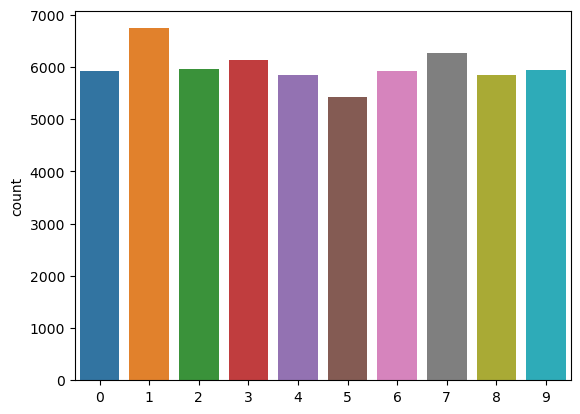

In [29]:
sns.countplot(x = y_train)

In [30]:
from collections import Counter
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [31]:
from keras.utils import to_categorical

In [32]:
x = [0,2,2,1,0,1,2]

In [33]:
to_categorical(x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
y_train.shape

(60000, 10)

In [36]:
y_test.shape

(10000, 10)

#### Define the network architecture

In [37]:
# Object of neural network
model = Sequential()

# Input layer
model.add(Dense(784, input_shape=(784,),
         activation='relu'))

# Hidden Layer-1
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 818970 (3.12 MB)
Trainable params: 818970 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the model

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

#### Train the model

In [40]:
history = model.fit(x_train, y_train, epochs=10,
         batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 54s 9ms/step - loss: 0.1839 - accuracy: 0.9437
Epoch 2/10
6000/6000 [==============================] - 52s 9ms/step - loss: 0.0915 - accuracy: 0.9718
Epoch 3/10
6000/6000 [==============================] - 52s 9ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 4/10
6000/6000 [==============================] - 52s 9ms/step - loss: 0.0552 - accuracy: 0.9836
Epoch 5/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.0477 - accuracy: 0.9870
Epoch 6/10
6000/6000 [==============================] - 58s 10ms/step - loss: 0.0403 - accuracy: 0.9884
Epoch 7/10
6000/6000 [==============================] - 102s 17ms/step - loss: 0.0382 - accuracy: 0.9898
Epoch 8/10
6000/6000 [==============================] - 101s 17ms/step - loss: 0.0352 - accuracy: 0.9912
Epoch 9/10
6000/6000 [==============================] - 99s 16ms/step - loss: 0.0322 - accuracy: 0.9911
Epoch 10/10
6000/6000 [==============================] - 101s 17ms/

In [41]:
history.history

{'loss': [0.18393903970718384,
  0.09147327393293381,
  0.06711585819721222,
  0.055200450122356415,
  0.047687213867902756,
  0.04033778980374336,
  0.0381988026201725,
  0.035211432725191116,
  0.032216060906648636,
  0.028592301532626152],
 'accuracy': [0.9437166452407837,
  0.9718166589736938,
  0.9793000221252441,
  0.9836333394050598,
  0.9869666695594788,
  0.9883666634559631,
  0.9897500276565552,
  0.9911500215530396,
  0.9911333322525024,
  0.9924833178520203]}

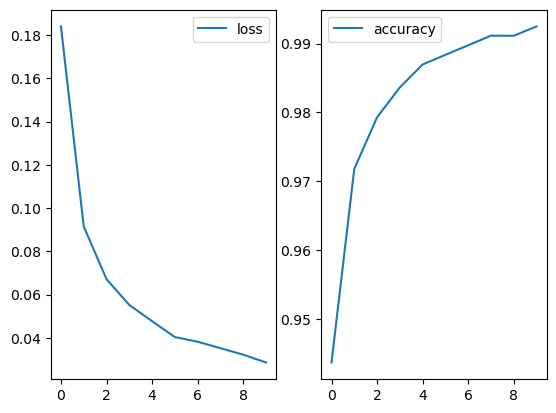

In [42]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 
         label='accuracy')
plt.legend()

In [43]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 37s 4ms/step - loss: 0.1222 - accuracy: 0.9826


[0.12220515310764313, 0.9825999736785889]